<font color='navygray'>09.0BollingerBands</font><br>
<font color='navygray'>Por Carlos Crespo Elizondo, MSF</font><br>
MF-013 Análisis de Inversión<br>
Maestría de Finanzas, Facultad de Economía, UANL<br>

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import plt
plt.style.use('seaborn')

In [3]:
accion = 'ipc'
url = 'http://bit.ly/oncedos-ipc'

In [6]:
df = pd.read_csv(url, index_col = 0, parse_dates = True)

In [7]:
df.sort_index(inplace = True)

In [8]:
df.head()

,Open,High,Low,Close
Date,,,,
2014-01-02,42725.53125,42841.96094,42115.35938,42188.44922
2014-01-03,42191.10938,42274.60938,41842.96094,42064.96875
2014-01-06,42093.55859,42143.16016,41522.48828,41525.94922
2014-01-07,41532.87891,41883.37109,41522.17188,41778.60156
2014-01-08,41783.80078,41915.35938,41389.39844,41515.48828


In [9]:
df = df[df.index > '1-1-2016']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 946 entries, 2016-01-04 to 2019-10-04
Data columns (total 4 columns):
Open     946 non-null float64
High     946 non-null float64
Low      946 non-null float64
Close    946 non-null float64
dtypes: float64(4)
memory usage: 37.0 KB


# Estrategia Bandas de Bollinger

In [11]:
pm = 20
sigma = 2

In [12]:
df['PM'] = df['Close'].rolling(pm).mean()

In [13]:
df['+2sigma'] = (df['Close'].rolling(pm).std()*2) + df['PM']
df['-2sigma'] = (df['Close'].rolling(pm).std()*(-2)) + df['PM']

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,Open,High,Low,Close,PM,+2sigma,-2sigma
Date,,,,,,,
2016-01-29,42386.23047,43631.17969,42370.98047,43630.76953,41415.071485,43008.879331,39821.263639
2016-02-02,43639.92188,43639.92188,42884.51172,43092.48828,41464.010938,43201.753356,39726.268520
2016-02-03,43120.67188,43306.37891,42916.01172,43257.53906,41524.803907,43425.104858,39624.502955
2016-02-04,43255.10156,44260.23047,43255.10156,43751.92969,41627.840821,43773.730647,39481.950994
2016-02-05,43759.00000,43833.76172,43215.96875,43229.67188,41756.245899,43965.100411,39547.391387


# Visualizar el precio cierre, PM, las bandas de bollinger

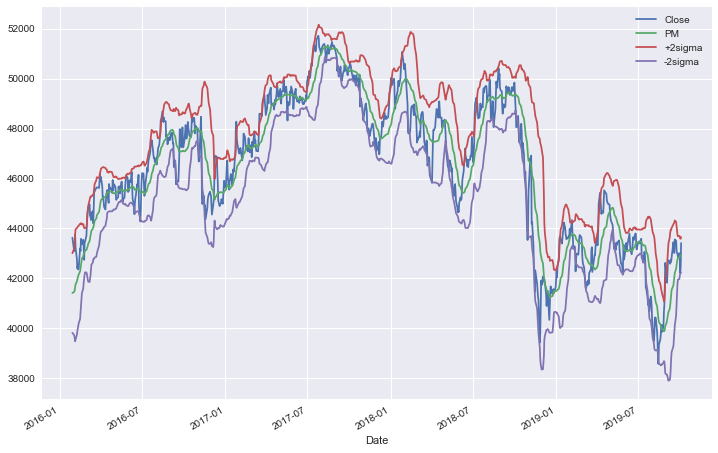

In [16]:
df[['Close', 'PM', '+2sigma', '-2sigma']].plot(figsize = (12,8));

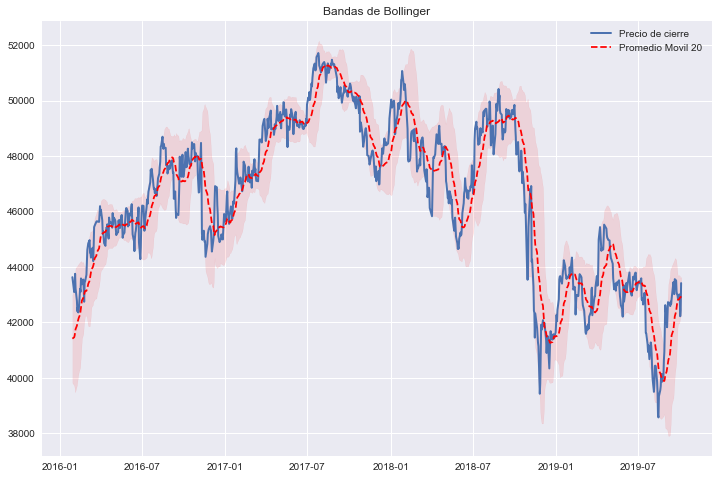

In [24]:
plt.figure(figsize = (12,8))

plt.plot(df['Close'].index, df['Close'], lw = 2, 
         label = 'Precio de cierre')

plt.plot(df['Close'].index, df['PM'], ls='--', color = 'red',
        label = 'Promedio Movil {}'.format(pm))

plt.fill_between(df['Close'].index, df['-2sigma'], df['+2sigma'],
                color = 'red', alpha = .1)

plt.title('Bandas de Bollinger')
plt.legend();

In [25]:
df['Posicion'] = np.nan

In [27]:
df.loc[df['Close'] > df['+2sigma'], ['Posicion']] = -1

In [31]:
df.loc[df['Close'] < df['-2sigma'], ['Posicion']] = 1

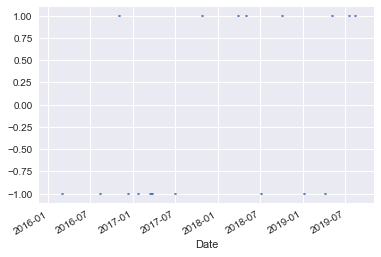

In [33]:
df['Posicion'].plot();

In [34]:
df.fillna(method='ffill', inplace = True)

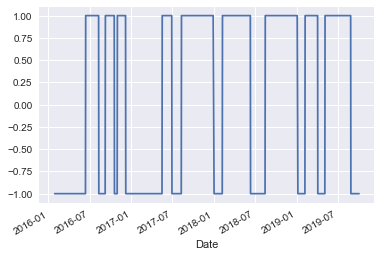

In [35]:
df['Posicion'].plot();

In [37]:
df['Retornos'] = np.log(df['Close']/df['Close'].shift(1))
df['Estrategia'] = df['Posicion'].shift(1) * df['Retornos']

In [38]:
df.dropna(inplace = True)

In [39]:
df[['Retornos', 'Estrategia']].sum()

Retornos     -0.004914
Estrategia   -0.029967
dtype: float64

In [40]:
df['Ret_Acum'] = np.exp(df['Retornos'].cumsum())
df['Estr_Acum'] = np.exp(df['Estrategia'].cumsum())

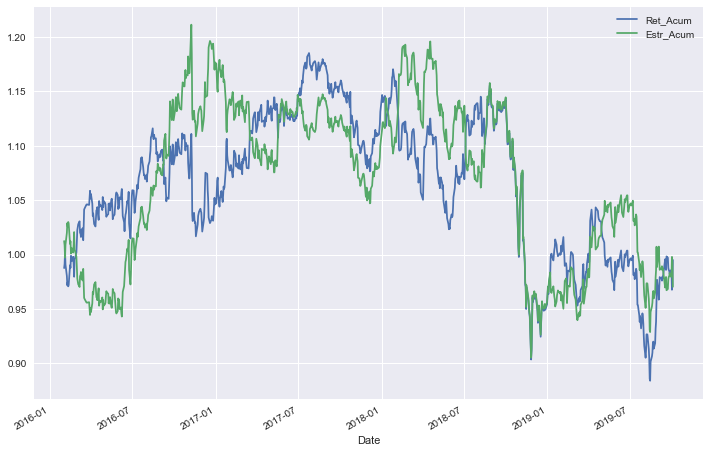

In [41]:
df[['Ret_Acum', 'Estr_Acum']].plot(figsize = (12,8));